# Homework 1

# Task 1 (Coding)
You should find:
1. simulate the move of $\vec{O}$ for $t$ = [0...10];
2. find and draw plots $v$, $a$, $a_n$, $a_τ$, $κ$ (Osculating circle) respect to $t$;
3. find $y(x)$, $\vec{v}$, $\vec{a}$, $\vec{a_n}$, $\vec{a_τ}$ and show it on the simulation.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
!pip3 install matplotlib numpy PyQt5


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\User\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


MovieWriter ffmpeg unavailable; using Pillow instead.


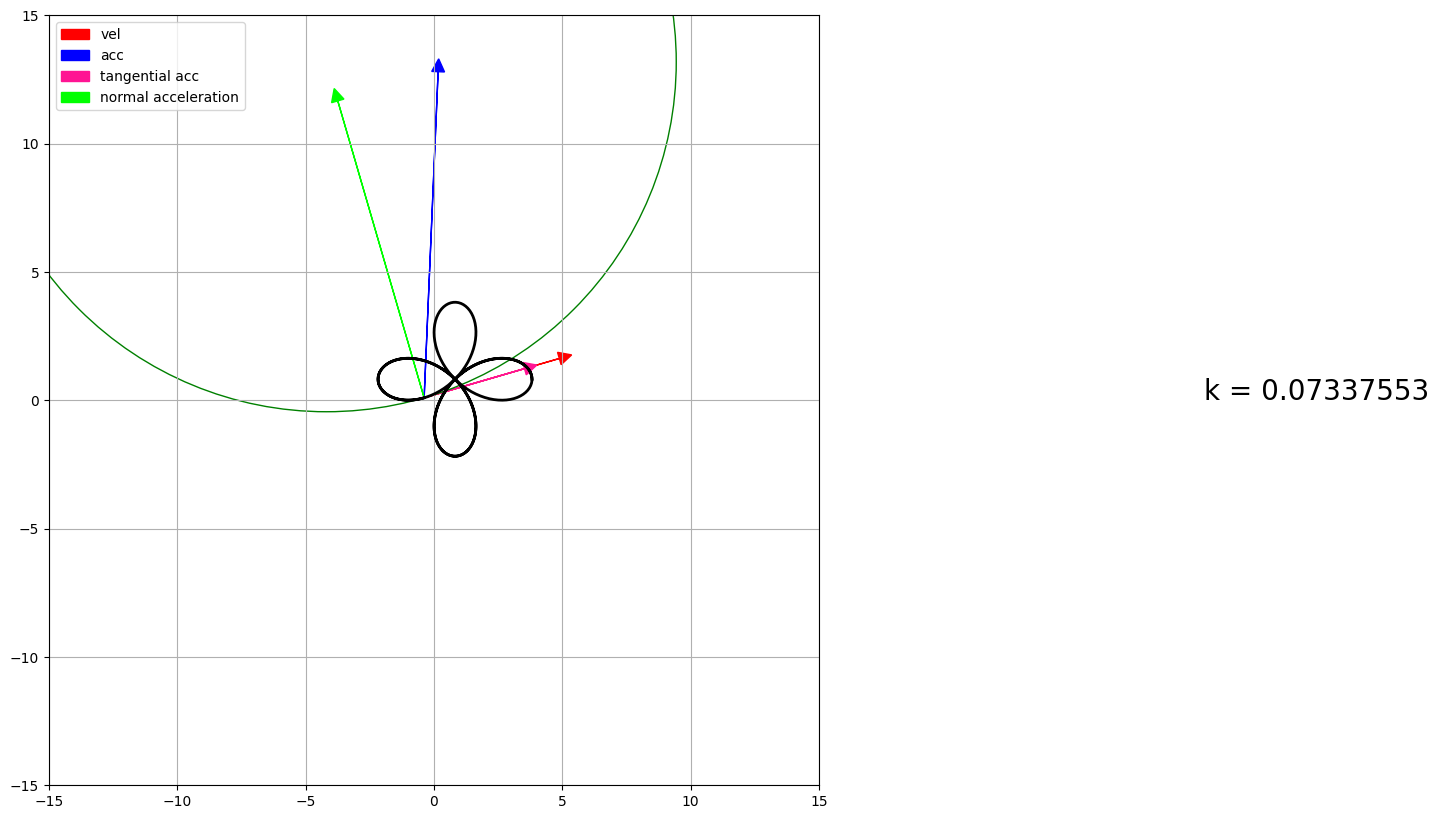

In [3]:
from dataclasses import dataclass
from typing import List
from matplotlib.animation import FuncAnimation

FPS = 30  # increase to make animation slower
t_start = 0
t_end = 10.0
frames = int((t_end - t_start) * FPS)


def fx(t):
    return 3*np.cos(2*t)*np.cos(t) + 0.82


def fy(t):
    return 3*np.cos(2*t)*np.sin(t) + 0.82


# function computes current sim time by frame number
def t(i):
    return t_start + i / FPS


# class take core of storing data points we computed in animation
@dataclass
class TracePoint:
    x: float
    y: float
    t: float

    vel: np.array
    acc: np.array

    @property
    def accn(self):
        # nothing special, just normal acceleration as difference
        return self.acc - self.acct

    @property
    def acct(self):
        # tangential acceleration is aligned with velocity vector
        acct = np.dot(self.acc, self.vel / np.linalg.norm(self.vel))
        return acct * self.vel / np.linalg.norm(self.vel)

    @property
    def k(self):
        # in original formula there are derivatives,
        # but in our sense they are just acceleration and veloctiy
        return np.linalg.norm(self.acc) / (np.sqrt(1 + self.vel.dot(self.vel))) ** 3

    @property
    def osculating_center(self):
        # i'm not a genius in math, but i think this is correct
        # http://mathonline.wikidot.com/the-osculating-circle-at-a-point-on-a-curve
        radius = 1 / self.k
        # find center of osculating center
        tan = self.vel / np.linalg.norm(self.vel)  # tangent
        b = np.cross(self.vel, self.acc)  # binormal
        n = np.cross(b, tan)  # normal
        n = n / np.linalg.norm(n)
        return np.array([self.x, self.y, 0]) + radius * n


# nothing will be interesting later, just initalization of plot

trace: List[TracePoint] = []

fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(-15, 15), ylim=(-15, 15))
ax.set_aspect("equal")
ax.grid()


line = ax.plot([], [], color="k", lw=2)[0]
# display velocity vector
vel = ax.arrow(0, 0, 0, 0, head_width=0.5, head_length=0.5, color="r", label="vel")
acc = ax.arrow(0, 0, 0, 0, head_width=0.5, head_length=0.5, color="b", label="acc")
acct = ax.arrow(0, 0, 0, 0, head_width=0.5, head_length=0.5, color="deeppink", label="tangential acc")
accn = ax.arrow(0, 0, 0, 0, head_width=0.5, head_length=0.5, color="lime", label="normal acceleration")

ktext = ax.text(30, 0, "", color="k", fontsize=20)

osculatingCircle = plt.Circle((0, 0), 5, color="g", fill=False)
ax.add_patch(osculatingCircle)
ax.legend()


def animate(i):
    ti = t(i)
    trace.append(
        TracePoint(
            x = fx(ti),
            y = fy(ti),
            t = ti,
            vel = np.array([-6*np.sin(2*ti)*np.cos(ti) - 3*np.cos(2*ti)*np.sin(ti),
                            -6*np.sin(2*ti)*np.sin(ti) + 3*np.cos(2*ti)*np.cos(ti), 0]),
            acc = np.array([-15*np.cos(2*ti)*np.cos(ti) + 12*np.sin(2*ti)*np.sin(ti),
                            -15*np.cos(2*ti)*np.sin(ti) - 12*np.sin(2*ti)*np.cos(ti), 0]),
        )
    )
    

    last = trace[-1]
    line.set_xdata([p.x for p in trace])
    line.set_ydata([p.y for p in trace])

    vel.set_data(x=last.x, dx=last.vel[0], y=last.y, dy=last.vel[1])
    acc.set_data(x=last.x, dx=last.acc[0], y=last.y, dy=last.acc[1])
    acct.set_data(x=last.x, dx=last.acct[0], y=last.y, dy=last.acct[1])
    accn.set_data(x=last.x, dx=last.accn[0], y=last.y, dy=last.accn[1])

    osculatingCircle.set_radius(1 / last.k)
    osculatingCircle.set_center(last.osculating_center)

    ktext.set_text(f"k = {last.k:.8f}")

anim = FuncAnimation(fig, animate, interval=1, frames=frames)
anim.save("task1_sim.gif")
# plt.draw()
plt.show()

# from IPython.display import HTML, display
# display(HTML(anim.to_jshtml()))
# plt.close(fig)


# Task 1 (plots)

Plots for  $v$, $a$, $a_n$, $a_τ$, $κ$ with respect to $t$

In [157]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time values
t_values = np.linspace(0, 10, 1000)

def velocity_function(t):
    return 3 * np.sqrt(1 + 3*np.sin(2*t)**2)

def acceleration_function(t):
    return 3 * np.sqrt(9*np.cos(2*t)**2 + 16)

def normal_acceleration(t):
    return (9*np.sin(2*t)**2 + 15) / (np.sqrt(1 + 3*np.sin(2*t)**2))

def tangential_acceleration(t):
    return (9*np.sin(4*t)) / (np.sqrt(1 + 3*np.sin(2*t)**2))

def curvature(t):
    return (3*np.sin(2*t)**2 + 5) / (3*((np.sqrt(1 + 3*np.sin(2*t)**2))**3))

# Calculate acceleration and velocity values
velocity_values = velocity_function(t_values)
acceleration_values = acceleration_function(t_values)
tangential_acceleration_values = tangential_acceleration(t_values)
normal_acceleration_values = normal_acceleration(t_values)
curvature_values= curvature(t_values)


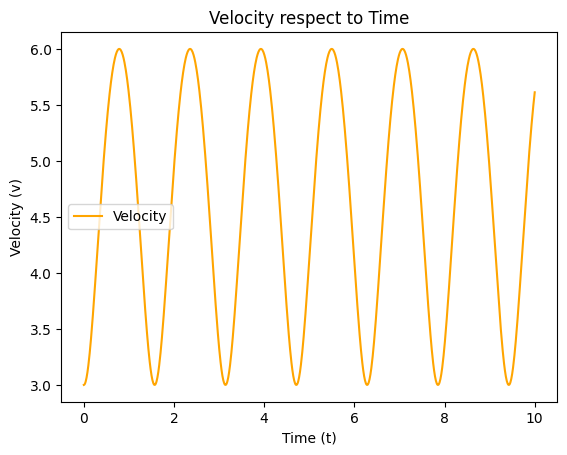

In [158]:
# Plot 1: Velocity respect to Time
plt.plot(t_values, velocity_values, label='Velocity', color='orange')
plt.title('Velocity respect to Time')
plt.xlabel('Time (t)')
plt.ylabel('Velocity (v)')
plt.legend()
plt.savefig("t1_velocity.jpg")

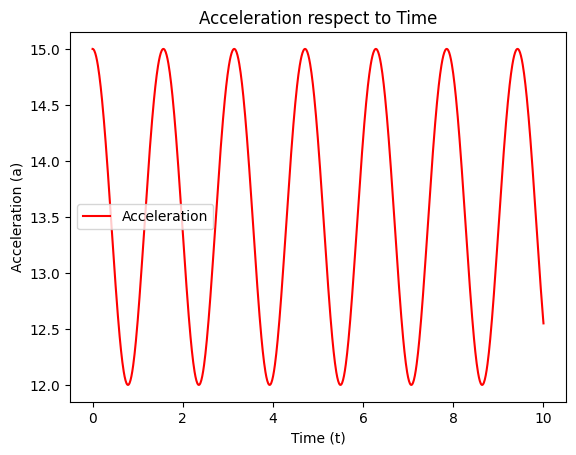

In [159]:
# Plot 2: Acceleration respect to Time
plt.plot(t_values, acceleration_values, label='Acceleration', color='red')
plt.title('Acceleration respect to Time')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a)')
plt.legend()
plt.savefig("t1_acceleration.jpg")

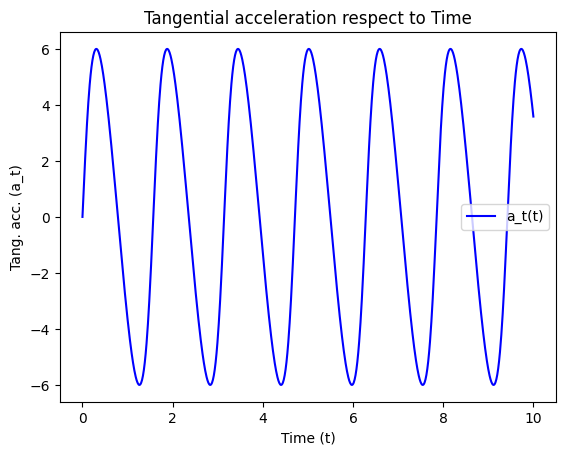

In [160]:
# Plot 3: Tangential acceleration respect to Time
plt.plot(t_values, tangential_acceleration_values, label='a_t(t)', color='blue')
plt.title('Tangential acceleration respect to Time')
plt.xlabel('Time (t)')
plt.ylabel('Tang. acc. (a_t)')
plt.legend()
plt.savefig("t1_tangential_acceleration.jpg")

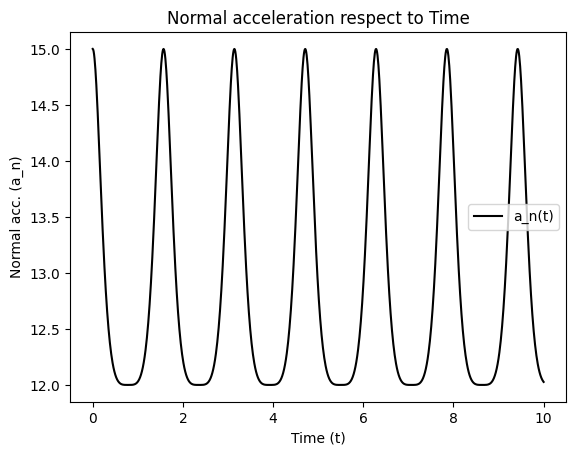

In [161]:
# Plot 4: Normal acceleration respect to Time
plt.plot(t_values, normal_acceleration_values, label='a_n(t)', color='black')
plt.title('Normal acceleration respect to Time')
plt.xlabel('Time (t)')
plt.ylabel('Normal acc. (a_n)')
plt.legend()
plt.savefig("t1_normal_acceleration.jpg")

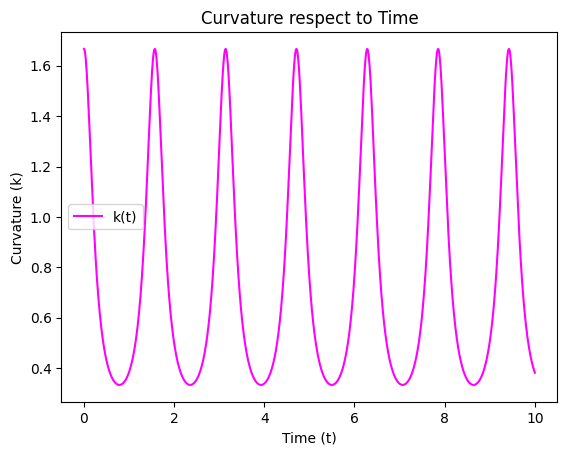

In [162]:
# Plot 5: Curvature respect to Time
plt.plot(t_values, curvature_values, label='k(t)', color='magenta')
plt.title('Curvature respect to Time')
plt.xlabel('Time (t)')
plt.ylabel('Curvature (k)')
plt.legend()
plt.savefig("t1_curvature.jpg")

# Task 2 (Coding)

You should solve the task, till the $M$ point travels $s$:
1. simulate this mechanism (obtain all positions of bodies 1, 2, 3);
2. velocity for $M$(draw plots for magnitudes and show vectors on simulation);
3. accelerations (tangent, normal, overall) for $M$(draw plots for magnitudes and show vectors on simulation);
4. draw plots of angular velocities for 2, 3 bodies.
If $R_2 = 40, r_2 = 30, R_3 = 15, x = x(t) = 3 + 80t^2, s_M = [0, 5]$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
!pip3 install matplotlib numpy PyQt5

In [172]:
from dataclasses import dataclass
from typing import List
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches
import math
FPS = 120  # increase to make animation slower
phi_start = 0.0
phi_end = 2 * np.pi

def fx1(t):
    return 40

def fy1(t):
    return 3 + 80 * (t**2)

def phi(i):
    return phi_start + i / FPS

def t(i):
    return t_start + i / FPS

@dataclass
class pointsTracer:
  velocity: np.array
  acceleration: np.array
  x: float
  y: float
  t: float
  @property
  def acct(self):
        # tangential acceleration is aligned with velocity vector
        acct = np.dot(self.velocity, self.acceleration / np.linalg.norm(self.velocity))
        return acct * self.velocity / np.linalg.norm(self.velocity)
  @property
  def accn(self):
        return self.acceleration - self.acct
   

tracer:List[pointsTracer]=[]
fig,ax = plt.subplots(figsize=(10,10))
point, = ax.plot([], [], 'bo', markersize=8)
point1, = ax.plot([], [], 'bo', markersize=8)
point2, = ax.plot([], [], 'bo', markersize=8)
pointx, = ax.plot([], [], 'bo', markersize=8)

xx = [40,40]
yy = [0,-30]
plt.plot(xx, yy,color='red')

def init():
  ax.set(xlim = (-100, 100), ylim = (-50, 80))
  ax.set_aspect("equal")
  ax.grid()
  global arrow_vector
  point.set_data([], [])
  point1.set_data([], [])
  point2.set_data([], [])
  pointx.set_data([], [])
  arrow_vector = ax.arrow(0, 0, 0, 0, head_width=0.5, head_length=0.5, color="b", label="motion vector")
  return [point,arrow_vector]

label = ax.text(0, 0, '', ha='left', va='center',fontsize=12)
circle1 = patches.Circle((0, 0), 40, edgecolor='black', facecolor='none')
circle2 = patches.Circle((0, 0), 30, edgecolor='black', facecolor='none')
circle3 = patches.Circle((15, 0), 15, edgecolor='black', facecolor='none')
box = patches.Rectangle((40,-30),5,5,edgecolor='magenta',facecolor='none')

velocity = ax.arrow(0, 0, 0, 0, head_width=0.5,head_length=0.5,color="y",label="velocity")
acceleration = ax.arrow(0, 0, 0, 0, head_width=0.5,head_length=0.5,color="m",label="acceleration")
acct = ax.arrow(0, 0, 0, 0, head_width=0.5,head_length=0.5,color="g",label="tan acceleration")
accn = ax.arrow(0, 0, 0, 0, head_width=0.5,head_length=0.5,color="c",label="normal acceleration")

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(box)
ax.legend()
def animate(frame):
    global arrow_vector
    phiM = frame * frame * 4 * np.pi / 3
    phi2 = frame * frame * 2 * np.pi
    phi1 = frame * frame * 2 * np.pi
    ybox = 3 + 80 * (frame**2)
    x = 15 * np.cos(phiM + np.pi) + 15
    y = 15 * np.sin(phiM)
    x1 = 30 * np.cos(phi2)
    y1 = -30 * np.sin(phi2)
    x2 = 40 * np.cos(phi1)
    y2 = -40 * np.sin(phi1)
    circle_center = (15, 0)
    circle_radius = 15
    tangent_angle = np.arctan2(y - circle_center[1], x - circle_center[0])
    arrow_length = frame * 120
    dx = arrow_length * np.cos(tangent_angle)
    dy = arrow_length * np.sin(tangent_angle)

    pointx.set_data(40,-ybox - 30)

    if arrow_vector is not None:
        arrow_vector.remove()
    arrow_vector = ax.arrow(x, y, dy, -dx, head_width=2, head_length=2, color="b", label="motion vector")
    point.set_data(x, y)
    label.set_position((x + 1,y - 1))
    label.set_text('\nM')
    point1.set_data(x1,y1)
    point2.set_data(x2,y2)
    box.set_x(37.5)
    box.set_y(-32.5-ybox)
    return circle1,
animation=FuncAnimation(fig, animate, frames = np.arange(0, np.sqrt(1/12), np.sqrt(1/12)/60), init_func = init, blit = True, repeat = False)
animation.save('task2_sim.gif')
# plt.draw()
# plt.show()

from IPython.display import HTML, display
display(HTML(animation.to_jshtml()))
plt.close(fig)

MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\User\AppData\Local\Temp\ipykernel_11068\3089746504.py:99: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pointx.set_data(40,-ybox - 30)
C:\Users\User\AppData\Local\Temp\ipykernel_11068\3089746504.py:104: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
C:\Users\User\AppData\Local\Temp\ipykernel_11068\3089746504.py:107: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point1.set_data(x1,y1)
C:\Users\User\AppData\Local\Temp\ipykernel_11068\3089746504.py:108: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point2.set_data(x2,y2)
C:\Users\User\AppData\Loc

# Task 2 (plots)

In [163]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time values
t_values = np.linspace(0, np.sqrt(1/12), 1000)

# Functions for point M
def velocity_m(t):
    return 120 * t

def acceleration_m(t):
    return 120 * np.sqrt(1 + 64 * t**4)

def normal_m_acceleration(t):
    return 960 * t**2

def tangential_m_acceleration(t):
    return np.ones((len(t),)) * 120

# Functions for body 2 and 3
def angular_velocity_2(t):
    return 4 * t

def angular_velocity_3(t):
    return 8 * t


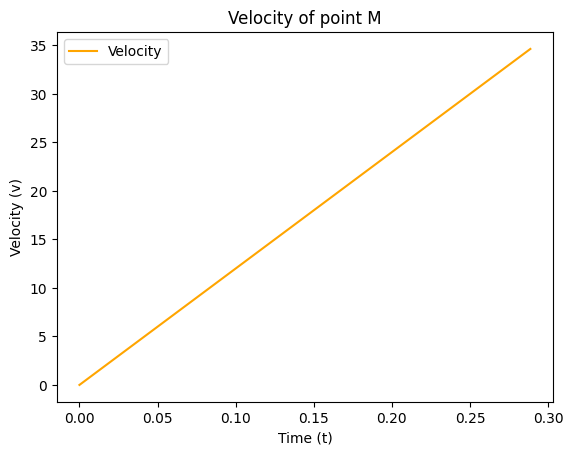

In [164]:
# Plot 1: Velocity of point M
plt.plot(t_values, velocity_m(t_values), label='Velocity', color='orange')
plt.title('Velocity of point M')
plt.xlabel('Time (t)')
plt.ylabel('Velocity (v)')
plt.legend()
plt.savefig("t2_velocity_m.jpg")

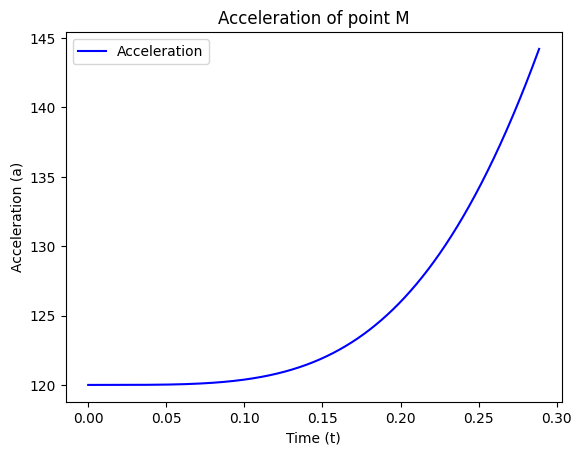

In [165]:
# Plot 2: Acceleration of point M
plt.plot(t_values, acceleration_m(t_values), label='Acceleration', color='blue')
plt.title('Acceleration of point M')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a)')
plt.legend()
plt.savefig("t2_acceleration_m.jpg")

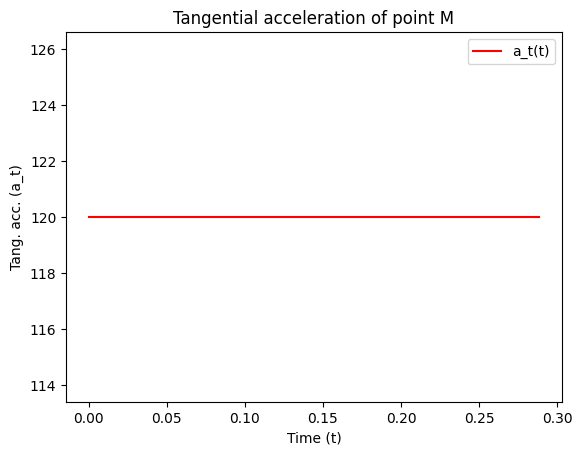

In [166]:
# Plot 3: Tangential acceleration of point M
plt.plot(t_values, tangential_m_acceleration(t_values), label='a_t(t)', color='red')
plt.title('Tangential acceleration of point M')
plt.xlabel('Time (t)')
plt.ylabel('Tang. acc. (a_t)')
plt.legend()
plt.savefig("t2_tangential_acceleration_m.jpg")

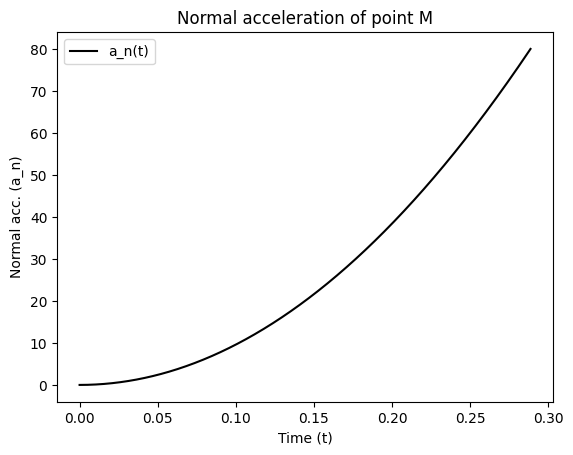

In [170]:
# Plot 4: Normal acceleration of point M
plt.plot(t_values, normal_m_acceleration(t_values), label='a_n(t)', color='black')
plt.title('Normal acceleration of point M')
plt.xlabel('Time (t)')
plt.ylabel('Normal acc. (a_n)')
plt.legend()
plt.savefig("t2_normal_acceleration_m.jpg")

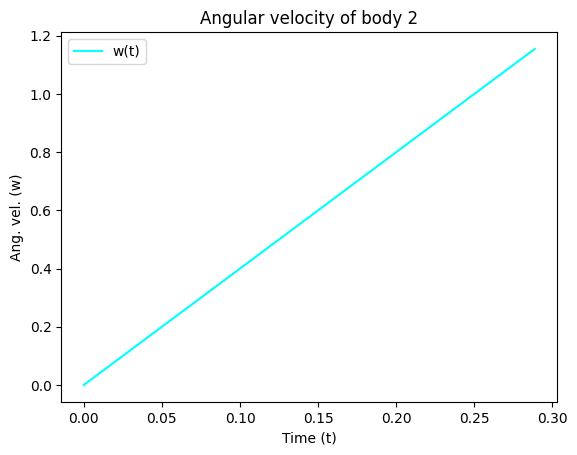

In [168]:
# Plot 5: Angular velocity of body 2
plt.plot(t_values, angular_velocity_2(t_values), label='w(t)', color='cyan')
plt.title('Angular velocity of body 2')
plt.xlabel('Time (t)')
plt.ylabel('Ang. vel. (w)')
plt.legend()
plt.savefig("t2_angular_velocity_2.jpg")

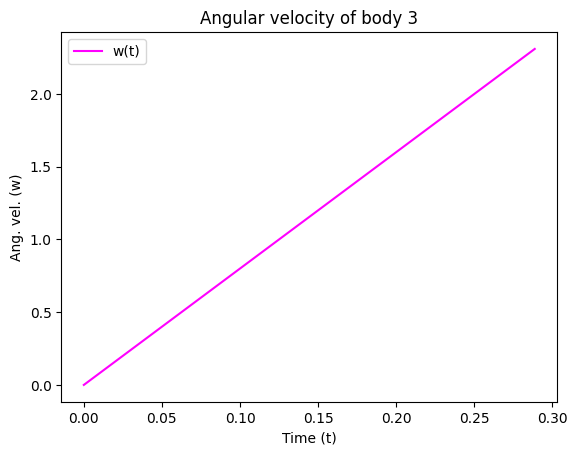

In [169]:
# Plot 6: Angular velocity of body 3
plt.plot(t_values, angular_velocity_3(t_values), label='w(t)', color='magenta')
plt.title('Angular velocity of body 3')
plt.xlabel('Time (t)')
plt.ylabel('Ang. vel. (w)')
plt.legend()
plt.savefig("t2_angular_velocity_3.jpg")

# Task 3 (Coding)
You should find:
1. simulate this mechanism (obtain all positions.) ($x_i(t), y_i(t),$ where $i$ is $A, B, C$ point)
2. velocities for $B, C$ (draw plots for magnitudes and show vectors on simulation);
3. accelerations for $B$ and $C$ (draw plots for magnitudes and show vectors on simulation);
4. draw a plot of angular velocity of body $BA$.
If $y_A(t) = 22.5 + 10sin(\frac{\pi}{5}*t); t = [0..10]$ sec.;
$AB = 45, BC = 30.$

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Function to update the position of the rectangles, the rod, and the labels
def update(num, rectA, rectB, line, pointC):
    # Update the position of rectangle A along the y-axis
    y_a = 22.5 + 10 * np.sin(np.pi*num/5) - 5
    rectA.set_y(y_a)
    
    # Get the updated x and y coordinates of rectangle A
    x_a, y_a = rectA.get_xy()
    
    # Update the position of rectangle B along the x-axis
    rectB.set_x(np.sqrt(45**2 - (y_a + 5)**2) - 5)
    
    # Get the updated x and y coordinates of rectangle B
    x_b, y_b = rectB.get_xy()
    
    # Update the position of point C on the rod
    x_C = (x_b + 5) / 3 
    y_C = (y_a + 5) * 2 / 3
    pointC.set_data(x_C, y_C)
    
    # Update the position of the rod
    line.set_data([x_a + 2.5, x_b + 5], [y_a + 5, y_b + 2.5])
    
    return rectA, rectB, line, pointC

# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)

# Create rectangle A
rectA = plt.Rectangle((-2.5, 17.5), 5, 10, fc='blue', alpha=0.5)

# Create rectangle B
rectB = plt.Rectangle((np.sqrt(45**2-22.5**2) - 5, -2.5), 10, 5, fc='red', alpha=0.5)

# Create the rod
line, = ax.plot([], [], 'green', lw = 2)

# Create point C on the rod
pointC, = ax.plot([], [], 'bo', markersize=5)

# Add rectangles and rod to the plot
ax.add_patch(rectA)
ax.add_patch(rectB)

# Set up the animation
ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 10, 101), interval=50, blit=True, fargs=(rectA, rectB, line, pointC))

plt.title('Rectangles A and B Connected by a Rod')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
ani.save("task3_sim.gif")
plt.legend()

from IPython.display import HTML, display
display(HTML(ani.to_jshtml()))
plt.close(fig)


C:\Users\User\AppData\Local\Temp\ipykernel_11068\3112511972.py:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pointC.set_data(x_C, y_C)
MovieWriter ffmpeg unavailable; using Pillow instead.
C:\Users\User\AppData\Local\Temp\ipykernel_11068\3112511972.py:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pointC.set_data(x_C, y_C)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\User\AppData\Local\Temp\ipykernel_11068\3112511972.py:23: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  pointC.set_data(x_C, y_C)


# Task 3 (plots)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# 
# # Define the time values
# t_values = np.linspace(0, 10, 1000)
# 
# def velocity_function(t):
#     return 3 * np.sqrt(1 + 3*np.sin(2*t)**2)
# 
# def acceleration_function(t):
#     return 3 * np.sqrt(9*np.cos(2*t)**2 + 16)
# 
# def normal_acceleration(t):
#     return (9*np.sin(2*t)**2 + 15) / (np.sqrt(1 + 3*np.sin(2*t)**2))
# 
# def tangential_acceleration(t):
#     return (9*np.sin(4*t)) / (np.sqrt(1 + 3*np.sin(2*t)**2))
# 
# def curvature(t):
#     return (3*np.sin(2*t)**2 + 5) / (3*((np.sqrt(1 + 3*np.sin(2*t)**2))**3))
# 
# # Calculate acceleration and velocity values
# # velocity_values = velocity_function(t_values)
# # acceleration_values = acceleration_function(t_values)
# # tangential_acceleration_values = tangential_acceleration(t_values)
# # normal_acceleration_values = normal_acceleration(t_values)
# # curvature_values= curvature(t_values)


In [ ]:
# # Plot 1: Velocity vs Time
# plt.plot(t_values, velocity_values, label='Velocity', color='orange')
# plt.title('Velocity vs Time')
# plt.xlabel('Time (t)')
# plt.ylabel('Velocity (v)')
# plt.legend()
# plt.savefig("t1_velocity.jpg")


In [21]:
from sympy import solve
from sympy.abc import a, b, c, d, e, f
a = -15
b = 0

ans_arr = solve([(e - a)**2 + (f - b)**2 - 40**2, (e)**2 + (f + 50)**2 - 30**2], [e, f], dict=True)

print(ans_arr[0][e], ans_arr[1][e],  sep="\n\n")
print(ans_arr[0][f], ans_arr[1][f],  sep="\n\n")

-1215/218 + 75*sqrt(1015)/109

-75*sqrt(1015)/109 - 1215/218
-3425/109 + 45*sqrt(1015)/218

-3425/109 - 45*sqrt(1015)/218
